In [119]:
import pandas as pd

In [120]:
movies = pd.read_csv(r"C:\Users\User\Downloads\movie_data\movies.csv")

In [121]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [122]:
movies.shape

(9742, 3)

In [123]:
ratings = pd.read_csv(r"C:\Users\User\Downloads\movie_data\ratings.csv")

In [124]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [125]:
ratings.shape

(100836, 4)

In [126]:
ratings['userId'].nunique()

610

In [144]:
rating_counts = ratings.groupby('movieId').size().reset_index(name='rating_count')
rating_counts

,movieId,rating_count
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
...,...,...
9719,193581,1
9720,193583,1
9721,193585,1
9722,193587,1


In [145]:
merged_df = pd.merge(df, rating_counts, on='movieId', how='inner')
merged_df
max_rated_movie = merged_df.loc[merged_df['rating_count'].idxmax()]
max_rated_movie

movieId                              356
title                Forrest Gump (1994)
genres          Comedy|Drama|Romance|War
rating_count                         329
Name: 314, dtype: object

In [127]:
data = pd.merge(movies,ratings,on = ['movieId'])
data

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [128]:
tags = pd.read_csv(r"C:\Users\User\Downloads\movie_data\tags.csv")

In [129]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [130]:
data[data['title']=='Matrix, The (1999)']

,movieId,title,genres,userId,rating,timestamp
45014,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1,5.0,964981888
45015,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4,1.0,945173385
45016,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,10,0.5,1455356378
45017,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,13,5.0,987457007
45018,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,15,4.0,1510571744
...,...,...,...,...,...,...
45287,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,603,5.0,963177606
45288,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,606,5.0,1171325929
45289,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,607,5.0,963080047
45290,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,608,5.0,1117162423


In [131]:
data2=pd.merge(tags,data,on=['userId','userId'])
data2.head()

,userId,movieId_x,tag,timestamp_x,movieId_y,title,genres,rating,timestamp_y
0,2,60756,funny,1445714994,318,"Shawshank Redemption, The (1994)",Crime|Drama,3.0,1445714835
1,2,60756,funny,1445714994,333,Tommy Boy (1995),Comedy,4.0,1445715029
2,2,60756,funny,1445714994,1704,Good Will Hunting (1997),Drama|Romance,4.5,1445715228
3,2,60756,funny,1445714994,3578,Gladiator (2000),Action|Adventure|Drama,4.0,1445714885
4,2,60756,funny,1445714994,6874,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller,4.0,1445714952


In [132]:
data2[(data2['title']=='Matrix, The (1999)') & (data2['tag']=='alternate universe')].head(10)
data2[(data2['title']=='Matrix, The (1999)') & (data2['tag']=='post apocalyptic')].head(10)
data2[(data2['title']=='Matrix, The (1999)') & (data2['tag']=='philosophy')].head(10)

,userId,movieId_x,tag,timestamp_x,movieId_y,title,genres,rating,timestamp_y
3634061,537,2571,philosophy,1424141098,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.0,1424141086
3636082,537,79132,philosophy,1424140124,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.0,1424141086
4568138,599,2959,philosophy,1498456898,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5.0,1519029461


In [133]:
data[data['title'] == 'Terminator 2: Judgment Day (1991)']['rating'].mean()

3.970982142857143

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='rating', ylabel='Density'>

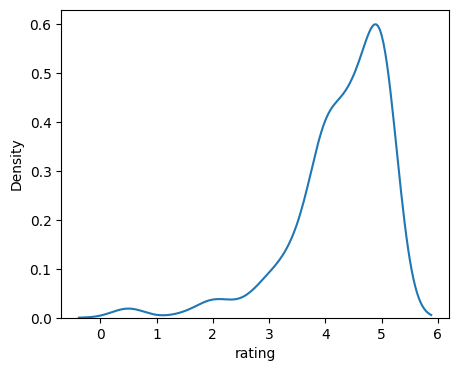

In [115]:
scatter=data[data['title']=='Fight Club (1999)']
plt.figure(figsize=(5,4))
sns.kdeplot(data=scatter,x='rating')

In [110]:
grouped_ratings = ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

In [112]:
join_df = pd.merge(df, grouped_ratings, on='movieId', how='inner')
filter_movies = join_df[join_df['count'] > 50]
filter_movies

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [113]:
popular_movie = filter_movies.loc[filter_movies['mean'].idxmax()]
popular_movie 

movieId                                 318
title      Shawshank Redemption, The (1994)
genres                          Crime|Drama
count                                   317
mean                               4.429022
Name: 277, dtype: object

In [84]:
top_5_movies = merged_df.sort_values(by='count', ascending=False).head(5)
top_5_movies

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [141]:
sci_fi_movies_df = df[df['genres'].str.contains('Sci-Fi')]
group_df = pd.merge(sci_fi_movies_df, grouped_ratings, on='movieId', how='inner')
sorted_sci_fi_df =group_df.sort_values(by='count', ascending=False)
sorted_sci_fi_df.head(3)

,movieId,title,genres,count,mean
161,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
13,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
25,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000


In [147]:
links = pd.read_csv(r"C:\Users\User\Downloads\movie_data\links.csv")

In [148]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [149]:
merged_df = pd.merge(ratings,links, on='movieId', how='inner')
merged_df

,userId,movieId,rating,timestamp,imdbId,tmdbId
0,1,1,4.0,964982703,114709,862.0
1,1,3,4.0,964981247,113228,15602.0
2,1,6,4.0,964982224,113277,949.0
3,1,47,5.0,964983815,114369,807.0
4,1,50,5.0,964982931,114814,629.0
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,4972582,381288.0
100832,610,168248,5.0,1493850091,4425200,324552.0
100833,610,168250,5.0,1494273047,5052448,419430.0
100834,610,168252,5.0,1493846352,3315342,263115.0


In [150]:
grouped_ratings = merged_df.groupby('imdbId')['rating'].agg(['count', 'mean']).reset_index()
grouped_ratings
join_df = pd.merge(merged_df, grouped_ratings, on='imdbId', how='inner')
join_df

,userId,movieId,rating,timestamp,imdbId,tmdbId,count,mean
0,1,1,4.0,964982703,114709,862.0,215,3.920930
1,1,3,4.0,964981247,113228,15602.0,52,3.259615
2,1,6,4.0,964982224,113277,949.0,102,3.946078
3,1,47,5.0,964983815,114369,807.0,203,3.975369
4,1,50,5.0,964982931,114814,629.0,204,4.237745
...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,4972582,381288.0,6,3.333333
100832,610,168248,5.0,1493850091,4425200,324552.0,7,4.142857
100833,610,168250,5.0,1494273047,5052448,419430.0,15,3.633333
100834,610,168252,5.0,1493846352,3315342,263115.0,25,4.280000


In [152]:
filter_movies =join_df[join_df['count'] > 50]
filter_movies
movie_id= filter_movies.sort_values(by='count', ascending=False)
movie_id

,userId,movieId,rating,timestamp,imdbId,tmdbId,count,mean
40993,276,356,5.0,858351182,109830,13.0,329,4.164134
15320,100,356,4.0,1100184829,109830,13.0,329,4.164134
82411,523,356,4.5,1503125976,109830,13.0,329,4.164134
80949,511,356,4.5,1450094222,109830,13.0,329,4.164134
90273,587,356,4.0,953138612,109830,13.0,329,4.164134
...,...,...,...,...,...,...,...,...
66763,430,4239,4.0,987107877,221027,4133.0,51,3.813725
46760,307,145,3.0,1186085751,112442,9737.0,51,3.245098
34977,234,1215,2.0,1004408088,106308,766.0,51,4.039216
32941,224,2100,5.0,971812094,88161,2619.0,51,3.117647


In [154]:
join_df = pd.merge(movieid, sci_fi_movies_df, on='movieId', how='inner')
join_df
movie_id= join_df.sort_values(by='count', ascending=False)
movie_id

,userId,movieId,rating,timestamp,imdbId,tmdbId,count,mean,title,genres
0,239,2571,5.0,1221158121,133093,603.0,278,4.192446,"Matrix, The (1999)",Action|Sci-Fi|Thriller
184,318,2571,3.5,1235479423,133093,603.0,278,4.192446,"Matrix, The (1999)",Action|Sci-Fi|Thriller
190,575,2571,4.0,926510261,133093,603.0,278,4.192446,"Matrix, The (1999)",Action|Sci-Fi|Thriller
189,414,2571,5.0,961514761,133093,603.0,278,4.192446,"Matrix, The (1999)",Action|Sci-Fi|Thriller
188,489,2571,4.0,1332772362,133093,603.0,278,4.192446,"Matrix, The (1999)",Action|Sci-Fi|Thriller
...,...,...,...,...,...,...,...,...,...,...
8757,34,45499,5.0,1162050637,376994,36668.0,52,3.355769,X-Men: The Last Stand (2006),Action|Sci-Fi|Thriller
8758,480,45499,3.0,1179165725,376994,36668.0,52,3.355769,X-Men: The Last Stand (2006),Action|Sci-Fi|Thriller
8759,462,45499,2.5,1158848886,376994,36668.0,52,3.355769,X-Men: The Last Stand (2006),Action|Sci-Fi|Thriller
8760,381,45499,3.0,1200824469,376994,36668.0,52,3.355769,X-Men: The Last Stand (2006),Action|Sci-Fi|Thriller
